<a href="https://colab.research.google.com/github/tejeshbhalla/tensorflow_projects/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape  #60000 samples for training and 10000 samples for testing 

X_train=X_train/255.0
X_train=X_train.reshape(len(X_train),28,28,1)
X_test=X_test/255.0
X_test=X_test.reshape(len(X_test),28,28,1)



In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Input,Dropout
from tensorflow.keras.models import Sequential,Model

In [27]:
model=Sequential()
model.add(Input(X_train[0].shape))
model.add(Conv2D(32,(3,3),strides=2,activation='relu'))
model.add(Conv2D(64,(3,3),strides=2,activation='relu'))
model.add(Conv2D(128,(3,3),strides=2,activation='relu'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(class_names),
                        activation='softmax'))

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)              

In [29]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
r=model.fit(X_train,y_train,epochs=15,validation_data=(X_test,y_test))

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5345 - accuracy: 0.8020 - val_loss: 0.4228 - val_accuracy: 0.8308
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3695 - accuracy: 0.8604 - val_loss: 0.3460 - val_accuracy: 0.8703
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3199 - accuracy: 0.8801 - val_loss: 0.3170 - val_accuracy: 0.8851
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2839 - accuracy: 0.8925 - val_loss: 0.3134 - val_accuracy: 0.8881
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2586 - accuracy: 0.9033 - val_loss: 0.2984 - val_accuracy: 0.8914
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2395 - accuracy: 0.9087 - val_loss: 0.2889 - val_accuracy: 0.8960
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2189 - accuracy: 0.9165 - val_loss: 0.2960 - val_accuracy:

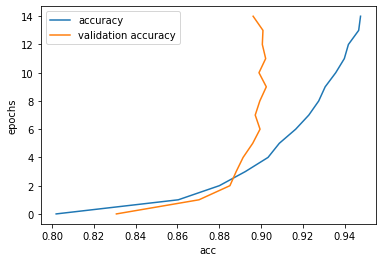

In [31]:
plt.plot(r.history['accuracy'],np.arange(0,15),label='accuracy')
plt.plot(r.history['val_accuracy'],np.arange(0,15),label='validation accuracy')
plt.xlabel('acc')
plt.ylabel('epochs')
plt.legend()

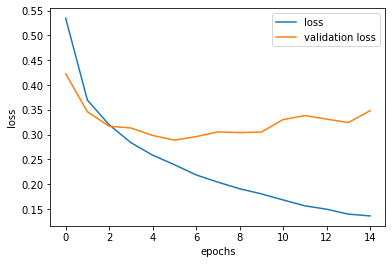

In [38]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='validation loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [40]:
model.predict(X_test)
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3482 - accuracy: 0.8962


[0.34820401668548584, 0.8962000012397766]

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test,np.argmax(model.predict(X_test,),axis=1))

print(classification_report(y_test,np.argmax(model.predict(X_test,),axis=1)))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.84      0.84      0.84      1000
           3       0.93      0.88      0.90      1000
           4       0.78      0.88      0.83      1000
           5       0.98      0.97      0.97      1000
           6       0.72      0.69      0.70      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



These are the predictions by our model


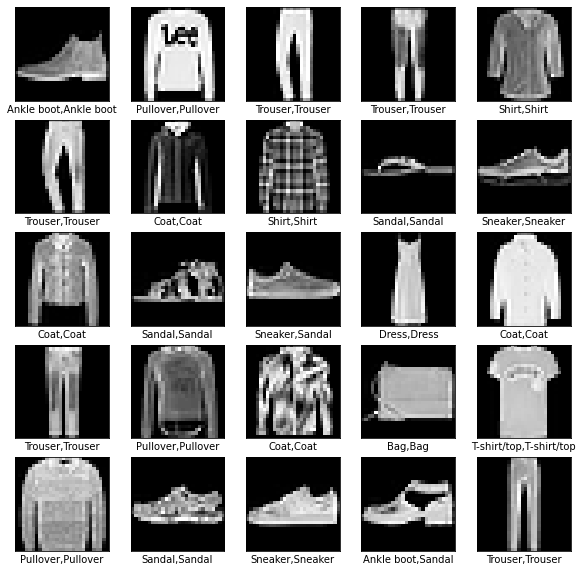

In [55]:
print('These are the predictions by our model')
predictions=np.argmax(model.predict(X_test,),axis=1)
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_test[i].reshape(28,28),cmap='gray')
  plt.xlabel(f'{class_names[y_test[i]]},{class_names[predictions[i]]}')

